# Datenauswertung (engl. data evaluation)

In [ ]:
%pip install wordcloud

/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(

PackagesNotFoundError: The following packages are missing from the target environment:
  - wordcloud



Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df2 = pd.read_csv('../datasets/complaints_data_cleaned.csv')
df2.head(20)

,author,posted_on,rating,text,state
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,MI
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,PA
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,CA
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,NH
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,WA
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,AL
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,UT
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,CT
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,NJ
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",GA


## Merkmalsanalyse (engl. feature analysis)
Merkmalsanalyse ist der analytische Prozess, der modellunabhängig die aus der NLP-Pipeline gewonnenen Merkmale, seien sie erstellt oder gelernten Merkmale untersucht, beschreibt und interpretiert.
Vokabulargröße 
Wortfrequenzen
TF-IDF-Gewichte 
Topic Zuordnungen
Top Word per Topic


# Datenkommunikation (engl. data communication)
Im Rahmen der Datenkommunikation erfolgt die Datenpräsentation (engl. data presentation) durch welche die Ergebnisse der Merkmals- und Modellanalyse visuell dargestellt werden.

# Merkmalsanalyse Darstellungen
Latente Merkmale (engl. learned/hidden features), die durch die Themenmodelle aus unstrukturierten Textdaten gewonnen wurden, werden durch Wortwol

Input-Merkmale

Output-Merkmale

LDA: Wortwolken zur Darstellung der Top-Wörter pro Thema sowie Balkendiagramme zur Darstellung der Themenverteilungen in den Beschwerdetexten
BERTopic

Explizite Merkmale

Semiexplizite Merkmale

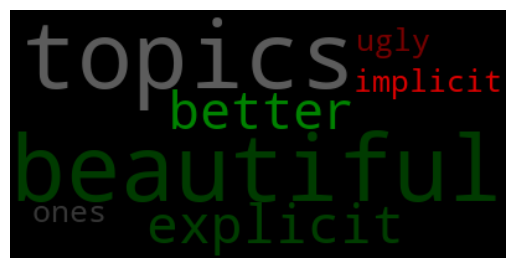

In [17]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """Topics that are beautiful and explicit are better than implicit and ugly ones."""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Visualisierung der ustrukturierten Daten

In [3]:
# Topic-Modellierung mit LDA (Latent Dirichlet Allocation)
# Ziel: Jeder Beschwerde ein dominantes Thema zuweisen, um das häufigste Thema pro Bundesstaat zu ermitteln.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

NUM_TOPICS = 5  # Anzahl der Themen

# 1. Texte vorbereiten
texts = df2['text'].dropna().astype(str).tolist()
print(f"✓ {len(texts)} Beschwerdetexte geladen")

# 2. Texte vektorisieren (Bag-of-Words)
vectorizer = CountVectorizer(
    max_df=0.95,            # Wörter, die in >95% der Dokumente vorkommen, ignorieren
    min_df=2,               # Wörter, die in <2 Dokumenten vorkommen, ignorieren
    stop_words='english',   # Englische Stoppwörter entfernen
    max_features=5000       # Maximal 5000 Features
)
doc_term_matrix = vectorizer.fit_transform(texts)
print(f"✓ Document-Term-Matrix: {doc_term_matrix.shape}")

# 3. LDA-Modell trainieren
lda_model = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    random_state=42,
    max_iter=20,
    learning_method='online'
)
doc_topics = lda_model.fit_transform(doc_term_matrix)
print(f"✓ LDA-Modell trainiert mit {NUM_TOPICS} Themen")

# 4. Topic-Labels aus den Top-Wörtern ableiten
feature_names = vectorizer.get_feature_names_out()
topic_labels = {}

print(f"\n{'='*60}")
print("Erkannte Themen (Top-10 Wörter pro Thema):")
print(f"{'='*60}")

for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    topic_labels[topic_idx] = f"Thema {topic_idx + 1}"  # Kurzlabel: Thema 1, Thema 2, ...
    print(f"\n{topic_labels[topic_idx]}: {', '.join(top_words[:3])}")
    print(f"  Alle Top-10: {', '.join(top_words)}")

# 5. Dominantes Thema pro Beschwerde zuweisen
df2_with_topics = df2.copy()
# Nur für Zeilen mit Text
valid_mask = df2['text'].notna()
df2_with_topics.loc[valid_mask, 'dominant_topic'] = np.argmax(doc_topics, axis=1)
df2_with_topics.loc[valid_mask, 'topic_label'] = df2_with_topics.loc[valid_mask, 'dominant_topic'].map(topic_labels)

print(f"\n✓ Dominantes Thema für {valid_mask.sum()} Beschwerden zugewiesen")
print(f"\nVerteilung der Themen:")
print(df2_with_topics['topic_label'].value_counts())

✓ 5626 Beschwerdetexte geladen
✓ Document-Term-Matrix: (5626, 5000)
✓ LDA-Modell trainiert mit 5 Themen

Erkannte Themen (Top-10 Wörter pro Thema):

Thema 1: called, comcast, said
  Alle Top-10: called, comcast, said, technician, tech, time, service, appointment, told, phone

Thema 2: month, comcast, 00
  Alle Top-10: month, comcast, 00, contract, 99, year, package, price, fee, pay

Thema 3: service, comcast, cable
  Alle Top-10: service, comcast, cable, customer, told, phone, internet, just, box, called

Thema 4: comcast, service, internet
  Alle Top-10: comcast, service, internet, speed, problem, tv, cable, time, channels, business

Thema 5: comcast, service, account
  Alle Top-10: comcast, service, account, told, called, credit, phone, customer, number, did

✓ Dominantes Thema für 5626 Beschwerden zugewiesen

Verteilung der Themen:
topic_label
Thema 3    2598
Thema 5    1279
Thema 4     764
Thema 1     620
Thema 2     365
Name: count, dtype: int64


# Visualisierung BERTopic
Nutzung modellspezifischer Visualisierungsmöglichkeiten zur weiterführenden Analyse (Topic Word Scores, Topic over Time, Intertopic Distance Map, Topics per Class).

# Visualisierung der Choroplethenkarte

In [4]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

print(f"Datensatz geladen: {len(df2)} Beschwerden")
print(f"Verfügbare Spalten: {df2.columns.tolist()}")

# Beschwerdeanzahlen pro Bundesstaat aggregieren
complaints_by_state = df2.groupby('state').size().reset_index(name='complaints')
complaints_by_state = complaints_by_state.sort_values('complaints', ascending=False)

# --- Überproportional dominantes Thema pro Bundesstaat ---
# Statt einfach das häufigste Thema zu nehmen (das national dominant ist),
# wird berechnet, welches Thema in einem Bundesstaat ÜBERREPRÄSENTIERT ist
# im Vergleich zur nationalen Verteilung.

# 1. Nationale Themenverteilung berechnen
national_topic_dist = df2_with_topics['dominant_topic'].value_counts(normalize=True)
print(f"\nNationale Themenverteilung:")
for topic, share in national_topic_dist.items():
    print(f"  Thema {int(topic)} ({topic_labels.get(int(topic), '?')}): {share:.1%}")

# 2. Themenverteilung pro Bundesstaat + Überrepräsentation berechnen
def get_distinctive_topic(state_group):
    """Ermittelt das Thema, das im Bundesstaat am stärksten überrepräsentiert ist."""
    state_dist = state_group['dominant_topic'].value_counts(normalize=True)
    
    best_topic = None
    best_ratio = -1
    
    for topic in state_dist.index:
        state_share = state_dist[topic]
        national_share = national_topic_dist.get(topic, 0.001)  # Fallback
        ratio = state_share / national_share  # Überrepräsentationsfaktor
        
        if ratio > best_ratio:
            best_ratio = ratio
            best_topic = topic
    
    return pd.Series({
        'dominant_topic': int(best_topic) if best_topic is not None else -1,
        'overrepresentation': best_ratio
    })

distinctive_topics = (
    df2_with_topics[df2_with_topics['dominant_topic'].notna()]
    .groupby('state')
    .apply(get_distinctive_topic)
    .reset_index()
)
distinctive_topics['topic_label'] = distinctive_topics['dominant_topic'].map(topic_labels)

# USA = 50 US-Bundesstaaten + DC
all_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC'
]

all_states_df = pd.DataFrame({'state': all_states})
all_states_complaints = all_states_df.merge(complaints_by_state, on='state', how='left')
all_states_complaints['complaints'] = all_states_complaints['complaints'].fillna(0).astype(int)

# Überproportional dominantes Thema pro Bundesstaat hinzufügen
all_states_complaints = all_states_complaints.merge(distinctive_topics, on='state', how='left')
all_states_complaints['topic_label'] = all_states_complaints['topic_label'].fillna('Keine Daten')
all_states_complaints['overrepresentation'] = all_states_complaints['overrepresentation'].fillna(0)

print(f"\nBeschwerdeanzahl + überproportional dominantes Thema pro Bundesstaat:")
print(all_states_complaints[['state', 'complaints', 'topic_label', 'overrepresentation']]
      .sort_values('complaints', ascending=False).to_string(index=False))

# Themenverteilung über Bundesstaaten
print(f"\nVerteilung der überproportionalen Themen über Bundesstaaten:")
print(all_states_complaints[all_states_complaints['complaints'] > 0]['topic_label'].value_counts())

print(f"\n✓ Karte erstellen mit {len(all_states_complaints)} Bundesstaaten")
print(f"  - mit Beschwerden:  {(all_states_complaints['complaints'] > 0).sum()}")
print(f"  - ohne Beschwerden: {(all_states_complaints['complaints'] == 0).sum()}")

# Hover-Text mit überproportional dominantem Thema
hover_text = [
    f"<b>{row['state']}</b><br>"
    f"Beschwerden: {row['complaints']}<br>"
    f"Charakteristisches Thema: {row['topic_label']}<br>"
    f"Überrepräsentationsfaktor: {row['overrepresentation']:.2f}x"
    if row['complaints'] > 0 else
    f"<b>{row['state']}</b><br>Beschwerden: 0<br>Keine Daten"
    for _, row in all_states_complaints.iterrows()
]

# Choroplethenkarte mit überproportional dominantem Thema im Hover
fig = go.Figure(data=go.Choropleth(
    locations=all_states_complaints['state'],
    z=all_states_complaints['complaints'].astype(float),
    text=hover_text,
    locationmode='USA-states',
    colorscale=[
        [0, "#499615"],                                         # wenige Beschwerden
        [0.33, "#fbde03"],                                      # durchschnittlich viele Beschwerden
        [1, '#8B0000']                                          # viele Beschwerden
    ],
    colorbar_title="Anzahl Beschwerden",
    hovertemplate='%{text}<extra></extra>'
))

fig.update_layout(
    title_text='Beschwerden nach US-Bundesstaaten (Choroplethenkarte)',
    geo_scope='usa',
    height=600,
    width=1000
)

fig.show()

Datensatz geladen: 5626 Beschwerden
Verfügbare Spalten: ['author', 'posted_on', 'rating', 'text', 'state']

Nationale Themenverteilung:
  Thema 2 (Thema 3): 46.2%
  Thema 4 (Thema 5): 22.7%
  Thema 3 (Thema 4): 13.6%
  Thema 0 (Thema 1): 11.0%
  Thema 1 (Thema 2): 6.5%

Beschwerdeanzahl + überproportional dominantes Thema pro Bundesstaat:
state  complaints topic_label  overrepresentation
   FL         775     Thema 1            1.112320
   CA         551     Thema 2            1.566547
   GA         413     Thema 5            1.118326
   IL         375     Thema 1            1.161497
   PA         323     Thema 4            1.208314
   NJ         274     Thema 1            1.258465
   TX         274     Thema 1            1.357817
   MI         265     Thema 2            1.337793
   TN         244     Thema 1            1.078490
   MD         237     Thema 1            1.646373
   VA         214     Thema 1            1.611305
   WA         214     Thema 4            1.307604
   MA    

## Modellanalyse (engl. model analysis)
Im Rahmen der Modellanalyse erfolgt eine Modellbewertung (engl. model evaluation) welche sich wiederum aus der Modellqualitätsmessung und Modellvalidierung besteht.
Modellanalyse ist modellspezifisch – sie untersucht, wie ein konkretes Modell die Features transformiert hat (z.B. LDA-Topics vs. BERTopic-Clusters)


### Modellqualitätsmessung (engl. model quality assessment / model scoring)
Die Messung der Modellqualität erfolgt je nach ML-Aufgabe durch extrinsische oder extrinsische Metriken. „Extrinsische Metriken werden beim überwachten ML verwendet, um zu ermitteln wie gut das Modell die „ground truth„ der Daten gelernt hat." Intrinsische Metriken hingehen "werden bei unüberwachten ML Aufgaben verwendet, da sie keine „ground truth„ benötigen, sondern auf der inneren Struktur der Modelllösung basieren“ (Kruse, 2022, p. 29).

####

### Modellvalidierung (engl. model validation)
In der Modellvalidierung wird überprüft, ob das Modell zuverlässig und generalisierbar ist – also ob die gemessene Qualität belastbar ist.